In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1

此題目標為找出一條DNA序列中的限制酶酵素切位。首先要求使用者輸入 Fasta 檔案之檔名，接著讀取該檔案中的DNA序列。檢查此 DNA 序列中有無`enzymes`（見此題末端）中限制酶的切位，若有，則將列印限制酶名字、切位序列、起始切位及終止切位。（Hint: 若你使用`find()`，那只能找出該限制酶在 DNA 序列的第一個和最後一個切位位置，建議使用全序列掃描檢查有無切位！）

假設有一個質體上的 MCS(Multiple cloning site) 包含了 `enzymes` 中的所有限制酶切位，且已知此序列之 CDS 是從 84 至 2123 ，請列出將此 DNA 序列 cloning 到該質體上適用的限制酶。

- 需要使用檔案：hsp70.txt
- 需要使用變數：enzymes（你可以將它設定成任何型態）

RE|Site
-|-
EcoRI|GAATTC
BamHI|GGATCC
SphI|GCATGC
XhoI|CTCGAG
XbaI|TCTAGA
SacI|CCGCGG
HindIII|AAGCTT

In [15]:
print("Question 1\tRestriction Enzyme Cutting Site\n")
# ============================================ Question 1 ============================================
# Type your answer below

# Select the file 
file_name = input("Select file to predict restriciton enzyme cutting site (as txt format):\t")

# Read sequence to be analyzed
seq = ""
with open(file_name) as file:
    file.readline()
    for line in file:
        seq += line.strip()

# Enzyme dictionary
enzymes = {'GAATTC': 'EcoRI',
           'GGATCC': 'BamHI',
           'GCATGC': 'SphI',
           'CTCGAG': 'XhoI',
           'TCTAGA': 'XbaI',
           'CCGCGG': 'SacI',
           'AAGCTT': 'HindIII'}

# Print results
print("--"*30)
print("Recognition site", "Enzyme", "Start", "Stop", sep="\t\t")
print("--"*30)
for nts in range(0, len(seq)):
    if seq[nts:nts+6] in enzymes:
        print(seq[nts:nts+6], enzymes[seq[nts:nts+6]], nts, nts+6, sep="\t\t")
        
print("\nRE can be used:")
print("1.\tSphI")
print("2.\tHindIII")
        
# END
print("\n\n\n")

Question 1	Restriction Enzyme Cutting Site

Select file to predict restriciton enzyme cutting site (as txt format):	hsp70.txt
------------------------------------------------------------
Recognition site		Enzyme		Start		Stop
------------------------------------------------------------
GCATGC		SphI		45		51
TCTAGA		XbaI		775		781
GAATTC		EcoRI		1602		1608
GAATTC		EcoRI		1874		1880
AAGCTT		HindIII		2161		2167
TCTAGA		XbaI		2623		2629
TCTAGA		XbaI		3066		3072
TCTAGA		XbaI		3089		3095
TCTAGA		XbaI		3209		3215
TCTAGA		XbaI		4072		4078

RE can be used:
1.	SphI
2.	HindIII






## Question 2

#### Q2.1. 此題為全基因表達量分析，最終目標為找出表達量有差異之基因（Differential expressed genes）(15 pts) 。

首先要求使用者輸入生物晶片（microarray）之結果檔名(array_data.csv)，檔案格式為 csv 格式。此檔案中將含有五個欄位：gene ID, F635 median, B635 median, F532 median, B532 median。635是紅螢光（Cy5）的波長，它代表的是癌組織樣本；而532是綠螢光（Cy3）的波長，代表的是正常組織樣本。F及B分別代表 Foreground（訊號值）及 Background （背景值）。

讀入資料後，需要進行資料前處理及表達量分析。

### 前處理

1. 減去背景值  
由於訊號會受到背景的影響，我們需要將各波長的訊號值（F）分別減去其背景值（B），所得的值才是真實讀值。  


2. 過濾不可靠的極端小值  
但在這些減去背景值的真實讀值中，有的訊號很低，有的甚至是負值，因此我們設定 100 為 cut off：凡 635 或 532 的真實小於100的讀值一律去除，留下的值才是我們認為『真實可靠』的值，進行下一步處理。  


2. Normalization  
作業中我們提過正規化（Normaliztion）的原因和方法，因為這筆資料是全基因表達量，因此可以使用global normalization。分別將 635 及 532 的值加總，再將個別基因表達量除以總和，使 635 和 532 的總和皆為 1，完成正規化。

### 表達量分析

1. 取正規化後癌組織與正常組織訊號之比值，這表示某基因在癌細胞上調或下調多少倍。我們說過極值所帶來的影響，所以請將這個比值進行 log2 轉換。


2. 找出上調及下調最大的五個基因，及其 log2 比值。

- 需要使用檔案：array_data.csv

In [24]:
print("Question 2\tGene expression analysis\n")
# ============================================ Question 2 ============================================
# Type your answer below

# Read file
file = input("Enter the file name of array data (as csv format): ")
print("\n")
data = pd.read_csv(file)

# Background subtraction and store the net value
data["net635"] = data['F635 Median'] - data['B635 Median']
data["net532"] = data['F532 Median'] - data['B532 Median']

# Remove net value below 100
data.drop(data[(data['net532']<100)].index, inplace=True)
data.drop(data[(data['net635']<100)].index, inplace=True)

# Normalization
data['net532']= data['net532']/data['net532'].sum()
data['net635']= data['net635']/data['net635'].sum()

# Log2 transformation (3 decimal place)
data["log2 635/532"] = np.round(np.log2(data['net635']/data["net532"]), 3)

# Filter those log2 ratio >= 1 or <= -1
data_filtered = data[np.logical_or((data['log2 635/532']<=-1), (data['log2 635/532']>=1))]

# Compute the most five upregulated and downregulated gene and print them
lowest5 = data_filtered["log2 635/532"].sort_values()[0:5]
highest5 = data_filtered["log2 635/532"].sort_values(ascending=False)[0:5]
print("Top 5 of upregulated genes:\nID\tlog2 635/532\n",highest5,"\n",sep="")
print("Top 5 of downregulated genes:\nID\tlog2 635/532\n", lowest5,"\n",sep="")

# END
print("\n\n\n")

Question 2	Gene expression analysis

Enter the file name of array data (as csv format): array_data.csv


Top 5 of upregulated genes:
ID	log2 635/532
2294    6.495
1449    6.054
2260    5.837
4965    5.553
794     5.483
Name: log2 635/532, dtype: float64

Top 5 of downregulated genes:
ID	log2 635/532
6286    -5.198
6307    -4.479
1533    -4.006
10907   -3.980
6209    -3.824
Name: log2 635/532, dtype: float64







### Q 2.2. Clustering by gene expression
肺癌可以分為小細胞肺癌（SCLC）及非小細胞肺癌（NSCLC），其中非小細胞肺癌又可分為大細胞癌（LCLC）、鱗狀細胞癌（SCC）、肺腺癌（Adeno/AC），這些不同 subtype 的癌症，基因表達量也會有所不同。`clustered.csv` 是經過初步篩選的資料，裡面記錄著各種肺癌基因表達量，樣本數共有 70 個（column），基因數共有 258 個（row）。第一欄（column）記錄基因名字、而第一列（row）記錄樣本屬於哪種肺癌。`unknown.csv`記錄了某病患 `X` 的 258 個基因表達量，但我們不知道它屬於哪種肺癌。

請使用你學過的 clustering 方法，判斷 `unknown.csv` 應該屬於哪種肺癌，將你認為的答案列印出來（例如`X belongs to ....`），並提供你判斷的證據。


- 需要使用檔案：clustered.csv, unknown.csv
- 可能會使用到的函式: .join(), .concat(), .append()

/Users/makaylatang/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


X belongs to Adeno, 因為x所在圖中最右邊的cluster裡，且其cluster中其他皆為Adeno，故x可能為Adeno


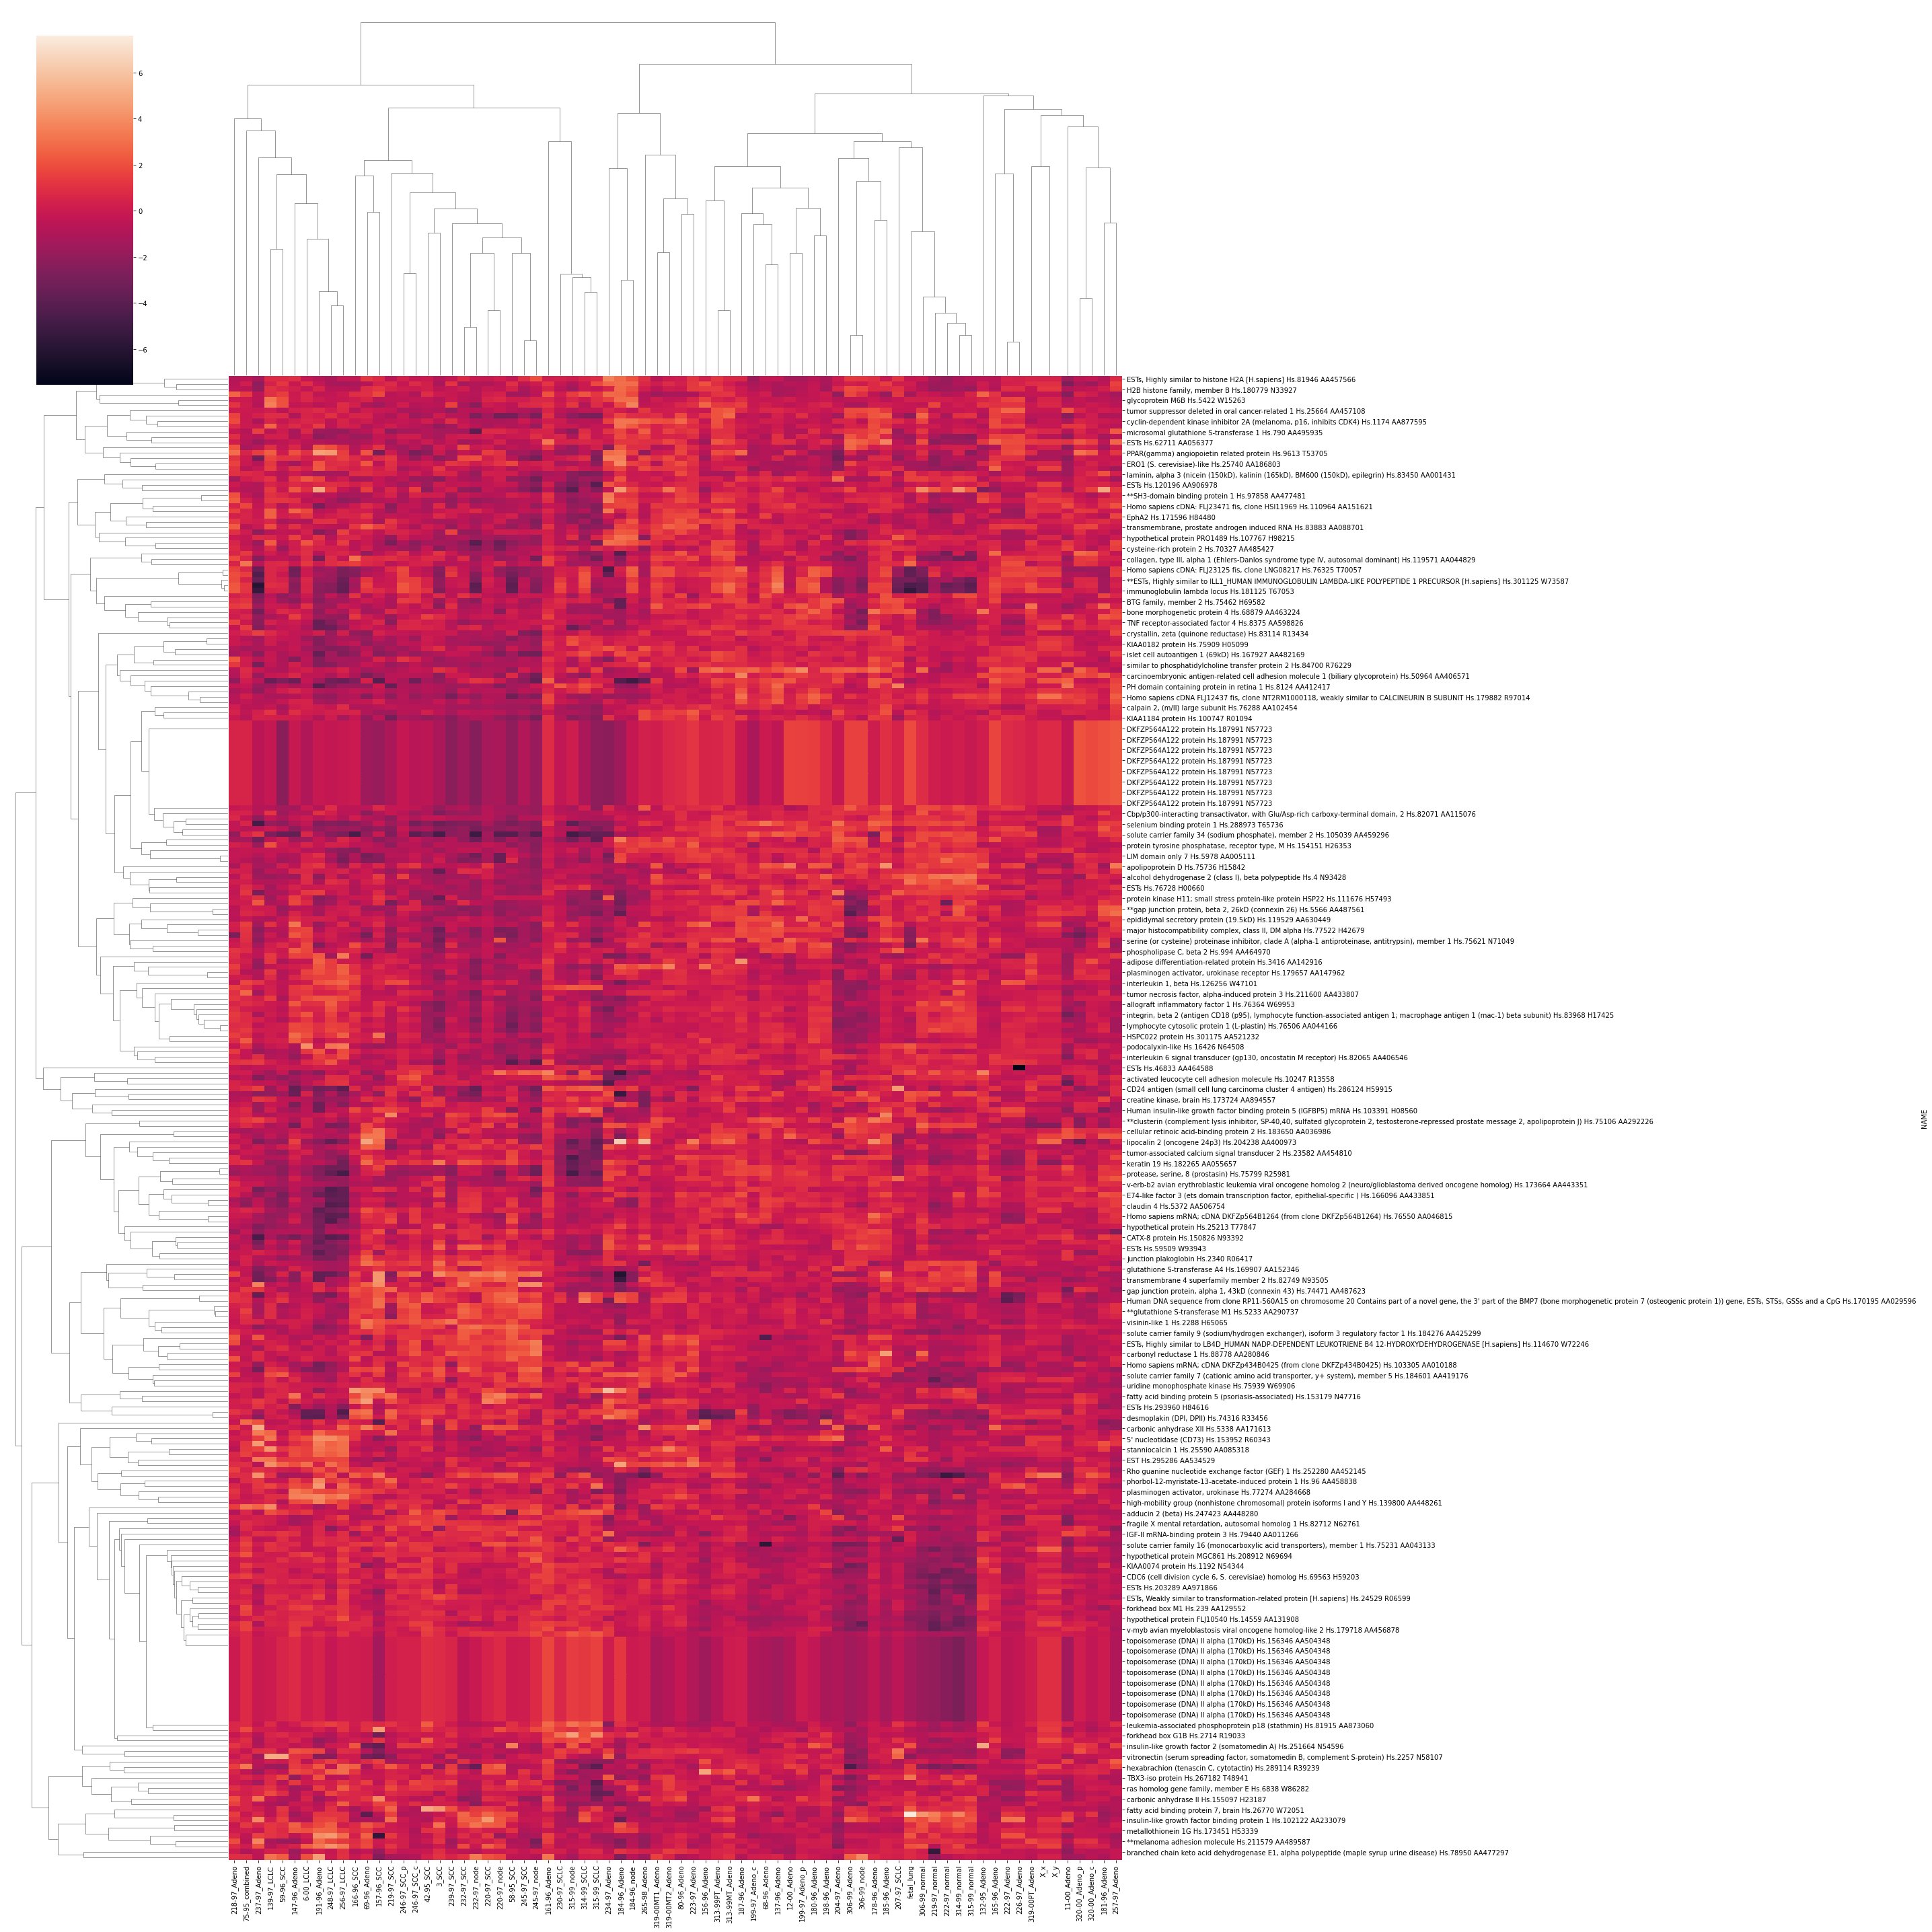

In [27]:
cluster = pd.read_csv('clustered.csv', index_col=0)
sample = pd.read_csv('unknown.csv',index_col=0)
join = pd.merge(cluster, sample, left_index=True, right_index=True)

sns.clustermap(join,figsize=(40, 40), metric = 'correlation', col_cluster = True)
pass

print('X belongs to Adeno' ', ' '因為x所在圖中最右邊的cluster裡，且其cluster中其他皆為Adeno，故x可能為Adeno')

## Question 3 Similarity comparison

蝙蝠和人類的冠狀病毒 DNA 序列分別存在`bat_virus.txt`以及`hsa_virus.txt`中，它們都是 **Fasta format** 。請要求使用者輸入這兩個檔案名稱後，分別讀入檔案中的 DNA 序列（以下分別叫`bat_virus`以及`hsa_virus`）。

#### DNA
 
對 `bat_virus` 進行**一萬次** mutation，每次突變在任一點上，突變結果可以是任一核苷酸（A,T,C, or G）。從第 0 次突變開始，每 200 次的突變結果的序列與 `hsa_virus` 序列進行核苷酸比較，若核苷酸相同，則分數 +1，將總分除以序列長度乘100，為兩者相似度。例如：

0-mutation  
hsa_virus: ATCGATCGATCG  
bat_virus: ATCGATCGATCG  
similarity = 12/12 * 100 = 100

200-mutation  
hsa_virus: ATCGATCGATCG  
bat_virus: TTTTTTTTATCG  
similarity = 4/12 * 100 = 33.33

400-mutation  
hsa_virus: ATCGATCGATCG  
bat_virus: TTTTTTTTTTCG  
similarity = 2/12 * 100 = 16.67


#### Protein

此外，也要將兩個 DNA 轉譯成蛋白質，比較兩者蛋白序列（以下分別叫`bat_prot`以及`hsa_prot`）。同樣的，若氨基酸相同則分數 +1，分數的加總除上蛋白序列長度即為相似度。不同的是每次突變後的`bat_virus`轉譯產生的`bat_prot`都要與`hsa_prot`進行比較。突變的 DNA 序列可能提早遇到 stop codon，造成兩個蛋白序列長度不一，若遇到這種狀況，則此後不需要再進行比較。例如：

0-mutation  
hsa_prot: MGPLYACILE*  
bat_prot: MGPLYACILE*  
similarity = 10/10 * 100 = 100

1-mutation  
hsa_prot: MGPLYACILE*  
bat_prot: AGPLYACILE*  
similarity = 9/10 * 100 = 90

2-mutation  
hsa_prot: MGPLYACILE*  
bat_prot: AAPLYACILE*  
similarity = 8/10 * 100 = 80

3-mutation  
hsa_prot: MGPLYACILE*  
bat_prot: AGPL* ACILE*  
===> 長度不同，從這裡開始不用進行蛋白質序列比較。

#### Plot

分別將 DNA 及 Protein 的相似度視覺化：橫軸為突變次數，縱軸為相似度。

- 需要使用檔案：hsa_virus.txt, bat_virus.txt
- 需要使用變數：codon_table
- 建議使用 numpy 中 4 種 random 函式的其中一種 

codon_table = {
"TTT":"F", "TTC":"F", "TTA":"L", "TTG":"L",
"TCT":"S", "TCC":"S", "TCA":"S", "TCG":"S",
"TAT":"Y", "TAC":"Y", "TAA":"*", "TAG":"*",
"TGT":"C", "TGC":"C", "TGA":"*", "TGG":"W",
"CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
"CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P",
"CAT":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
"CGT":"R", "CGC":"R", "CGA":"R", "CGG":"R",
"ATT":"I", "ATC":"I", "ATA":"I", "ATG":"M",
"ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
"AAT":"N", "AAC":"N", "AAA":"K", "AAG":"K",
"AGT":"S", "AGC":"S", "AGA":"R", "AGG":"R",
"GTT":"V", "GTC":"V", "GTA":"V", "GTG":"V",
"GCT":"A", "GCC":"A", "GCA":"A", "GCG":"A",
"GAT":"D", "GAC":"D", "GAA":"E", "GAG":"E",
"GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G"
}

Question 3	Similarity comparision

Please enter file name contain hsa virus sequence(as txt format): hsa_virus.txt
Please enter file name contain bat virus sequence(as txt format): bat_virus.txt






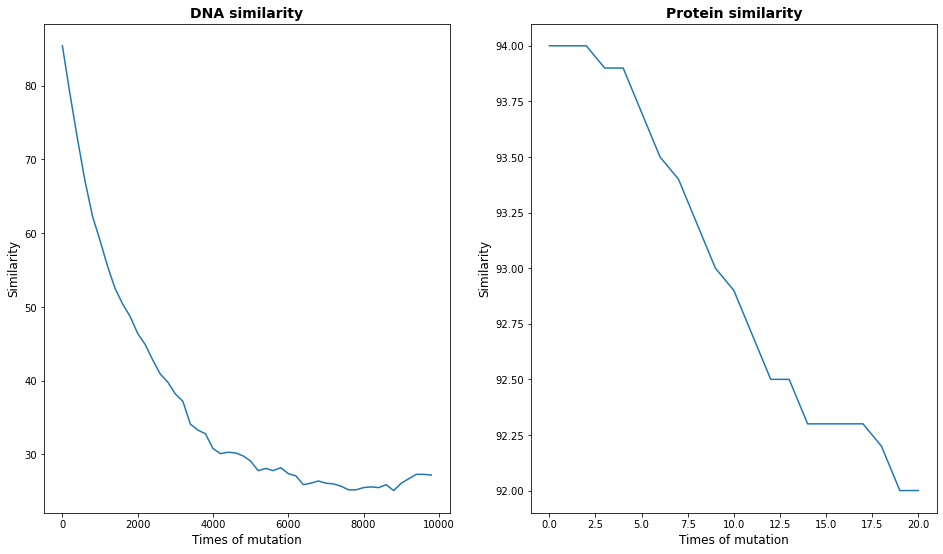

In [19]:
print("Question 3\tSimilarity comparision\n")
# ============================================ Question 3 ============================================
# Type your answer below

codon_table = {
"TTT":"F", "TTC":"F", "TTA":"L", "TTG":"L",
"TCT":"S", "TCC":"S", "TCA":"S", "TCG":"S",
"TAT":"Y", "TAC":"Y", "TAA":"*", "TAG":"*",
"TGT":"C", "TGC":"C", "TGA":"*", "TGG":"W",
"CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
"CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P",
"CAT":"H", "CAC":"H", "CAA":"Q", "CAG":"Q",
"CGT":"R", "CGC":"R", "CGA":"R", "CGG":"R",
"ATT":"I", "ATC":"I", "ATA":"I", "ATG":"M",
"ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
"AAT":"N", "AAC":"N", "AAA":"K", "AAG":"K",
"AGT":"S", "AGC":"S", "AGA":"R", "AGG":"R",
"GTT":"V", "GTC":"V", "GTA":"V", "GTG":"V",
"GCT":"A", "GCC":"A", "GCA":"A", "GCG":"A",
"GAT":"D", "GAC":"D", "GAA":"E", "GAG":"E",
"GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G"
}

def read_file(bat, hsa):
    hsa_virus_dna = ""
    bat_virus_dna = ""

    with open(bat) as file:
        file.readline()
        for line in file:
            hsa_virus_dna += line.strip()
        
    with open(hsa) as file:
        file.readline()
        for line in file:
            bat_virus_dna += line.strip()
    return hsa_virus_dna, bat_virus_dna

def translation(dna):
    """
    dna: DNA sequence (str)
    """

    prot = ""
    for i in range(0, len(dna), 3):
        tri_nt = dna[i:i+3]
        if codon_table[tri_nt] == "*":
            break
        else:
            prot += codon_table[tri_nt]
    return prot
    
def mutation(batV, hsaV, N):
    """
    batV: bat virus sequence(str)
    hsaV: hsa virus sequence(str)
    N: times of mutation(int)
    """
    
    # Translate human_virus protein, and convert DNA sequence from 'string' to 'np.array'
    # for sequence comparison in later.
    ary_hsa_virus_dna  = np.array(list(hsaV))
    ary_hsa_virus_prot = np.array(list(translation(hsaV)))

    
    # Randomly select mutation site N times at once
    mutation_sites = np.random.randint(0, len(batV), size=N)

    
    # Randomly select mutation bases N times at once
    new_bases = np.random.choice(list('ACTG'), size=N, replace=True)

    
    # For record the similarity between mut_seq and ori_seq in each mutation
    lst_dna_similarity  = []
    lst_prot_similarity = []

    
    # Mutation
    str_mutated_dna = batV
    for site, base in zip(mutation_sites, new_bases):
        str_mutated_dna = str_mutated_dna[:site] + base + str_mutated_dna[site+1:]
        ary_bat_virus_dna  = np.array(list(str_mutated_dna))
        ary_bat_virus_prot = np.array(list(translation(str_mutated_dna)))
        
        # Record DNA similarity
        lst_dna_similarity.append(np.round((np.sum(ary_bat_virus_dna == ary_hsa_virus_dna)/len(ary_hsa_virus_dna)), 3)*100)
        
        # Record protein similarity
        if len(ary_bat_virus_prot) == len(ary_hsa_virus_prot):
            lst_prot_similarity.append(np.round((np.sum(ary_bat_virus_prot == ary_hsa_virus_prot))/len(ary_hsa_virus_prot), 3)*100)

            
   
    # Record similarity in each 200 DNA mutation
    lst_dna_similarity_200 = []
    for elm in range(0, len(lst_dna_similarity), 200):
        lst_dna_similarity_200.append(lst_dna_similarity[elm])
    counter = np.arange(0, 10000, 200)
    
    # Plot
    plt.figure(figsize=(16,9))
    
    plt.subplot(1,2,1)
    plt.plot(counter, lst_dna_similarity_200)
    plt.title("DNA similarity", fontsize=14, fontweight="bold")
    plt.ylabel("Similarity", fontsize=12)
    plt.xlabel("Times of mutation", fontsize=12)
    
    plt.subplot(1,2,2)
    plt.plot(range(len(lst_prot_similarity)), lst_prot_similarity)
    plt.title("Protein similarity", fontsize=14, fontweight="bold")
    plt.ylabel("Similarity", fontsize=12)
    plt.xlabel("Times of mutation", fontsize=12);
    

# Select files
input_hsa = input("Please enter file name contain hsa virus sequence(as txt format): ")
input_bat = input("Please enter file name contain bat virus sequence(as txt format): ")

# Extract sequence from files
hsa_virus_dna, bat_virus_dna = read_file(input_hsa, input_bat)

# Mutation
mutation(bat_virus_dna, hsa_virus_dna, 10000)

# END
print("\n\n\n")